## KAVAKLIS NIKOLAS - 1115201400052
## KANELLAKI MARIA ANNA - 1115201400060

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import sys
import numpy as np
from sklearn import datasets
import matplotlib

## global variables for the columns that are extracted from the csv files

In [38]:
cols = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
        'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
        'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
        'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
        'property_type', 'price', 'availability_365', 'minimum_nights']
strs = ['transit','neighbourhood','bedrooms','beds','bathrooms','name','instant_bookable','host_response_rate','host_identity_verified','host_has_profile_pic','description','city','cancellation_policy', 'bed_type','amenities', 'room_type','property_type']
ints = ['id','zipcode','number_of_reviews','accommodates','availability_365', 'minimum_nights']
floats = ['latitude', 'longitude','review_scores_rating']
dates = ['last_review','host_since','first_review']

# Data exploration

## function that checks data types and places the str 'None Given' to any wrong or null info

In [39]:
def data_check(df):       
    df.columns = df.columns.str.strip()
    for i in ints:
        if df[i].dtypes == object:
            df[i] = df[i].str.replace(' ', '')
            df[i] = pd.to_numeric(df[i], errors='coerce')
    for f in floats:
        df[i] = pd.to_numeric(df[i], errors='coerce')
    df = df.fillna('None Given')

    df['price'] = df['price'].str.replace("$", "")
    df['price'] = df['price'].str.replace(",", "")
    df['price'] = df['price'].astype(float)

    return df

## function that readies the data and merges the necessary files of one month

In [60]:
#we used only the calendar and listing files from each month.
# we added a column named month to process monthly data easier
# and another one named average_price where we kept the monthly average


def merge_month(month):
    print(month + ' is being processed')
    # read calendar file
    cal = pd.read_csv(month+'/calendar.csv')
    dfc = pd.DataFrame(cal)
    dfc = dfc[['listing_id', 'date', 'price']]
    dfc = dfc.rename(columns={'listing_id': 'id'})
    # dfc = data_check(dfc)

    # keep dates of month 2019 only
    dfc['date'] = pd.to_datetime(dfc['date'])

    if month == 'april':
        mask = (dfc['date'] > '2019-04-01') & (dfc['date'] <= '2019-04-30')
    elif month == 'march':
        mask = (dfc['date'] > '2019-03-01') & (dfc['date'] <= '2019-03-31')
    elif month == 'febrouary':
        mask = (dfc['date'] > '2019-02-01') & (dfc['date'] <= '2019-02-28')
    else:
        print('Wrong month')

    dfc = dfc.loc[mask]

    # convert prices to floats
    dfc['price'] = dfc['price'].str.replace("$", "")
    dfc['price'] = dfc['price'].str.replace(",", "")
    dfc['price'] = dfc['price'].astype(float)


    # find average of prices per month and add that column
    Mean = dfc['id'].drop_duplicates()
    Mean = pd.DataFrame(Mean)
    Mean.insert(1, 'average_price', 0)
    Mean.insert(2,'month',month)

    j = 0
    for n in Mean['id']:
        tr = dfc.loc[dfc['id'] == n].mean()
        try:
            it = int(tr['price'])
        except:
            it = -1

        Mean.iat[j, 1] = it
        j = j + 1


    # read listing file of month
    listing = pd.read_csv(month+'/listings.csv',low_memory=False)
    dfl = pd.DataFrame(listing)
    dfl = data_check(dfl)

    # keep only columns that we need
    dfl = dfl[cols]

    # merge files and returns new merged data frame
    dataSet = pd.merge(Mean, dfl, on='id')
    df = pd.DataFrame(dataSet)
    return df

## create a dataframe for each month

In [41]:
df1 = merge_month('april')
df2 = merge_month('march')
df3 = merge_month('febrouary')

april is being processed
march is being processed
febrouary is being processed


## merge data sets and export data frame to csv

In [42]:
dataSet = pd.concat([df1, df2, df3])
train = pd.DataFrame(data=dataSet)
train.to_csv("train.csv", index=False, encoding='utf-8-sig')
train = pd.read_csv('train.csv')
df= train
df

id  average_price      month  zipcode  \
0        478626            120      april  10554.0   
1         10595             69      april  11526.0   
2         10988             82      april  11526.0   
3        484852             20      april  11362.0   
4        841795             20      april  11361.0   
...         ...            ...        ...      ...   
28117  32108520             70  febrouary  11742.0   
28118  32108680             22  febrouary  10439.0   
28119  32108733             80  febrouary  11742.0   
28120  32109675             96  febrouary  10673.0   
28121  32113196             71  febrouary  11741.0   

                                                 transit bedrooms beds  \
0      Getting to AthenStyle from either the Airport ...      1.0  1.0   
1      Note: 5-day ticket for all the public transpor...      3.0  5.0   
2      Note: 5-day ticket for all the public transpor...      2.0  2.0   
3                                             None Given      1.0  2.0   
4      Our studio provides excellent connection with ...      1.0  1.0   
...                                                  ...      ...  ...   
28117                                         None Given      1.0  1.0   
28118  Excellent Location, Close to Every Kind of Tra...      1.0  1.0   
28119                                         None Given      3.0  3.0   
28120                                         None Given      2.0  3.0   
28121                                         None Given      3.0  5.0   

      review_scores_rating  number_of_reviews neighbourhood  ...  \
0               None Given                  1         Psyri  ...   
1                     97.0                 19    Ambelokipi  ...   
2                     92.0                 31    Ambelokipi  ...   
3                     97.0                 45  Pedion Areos  ...   
4               None Given                  0  Pedion Areos  ...   
...                    ...                ...           ...  ...   
28117           None Given                  0       Koukaki  ...   
28118           None Given                  0      Larissis  ...   
28119           None Given                  0       Koukaki  ...   
28120           None Given                  0      Kolonaki  ...   
28121           None Given                  0       Koukaki  ...   

               cancellation_policy  bed_type  bathrooms accommodates  \
0                         moderate  Real Bed        1.0            3   
1      strict_14_with_grace_period  Real Bed        2.0            8   
2      strict_14_with_grace_period  Real Bed        1.0            5   
3      strict_14_with_grace_period  Real Bed        1.0            4   
4                         moderate  Real Bed        1.0            2   
...                            ...       ...        ...          ...   
28117                     moderate  Real Bed        1.0            2   
28118                     moderate  Real Bed        1.0            2   
28119                     moderate  Real Bed        2.0            6   
28120                     moderate  Real Bed        1.5            5   
28121                     flexible  Real Bed        1.0            8   

                                               amenities        room_type  \
0      {TV,Kitchen,Breakfast,Heating,"Family/kid frie...  Entire home/apt   
1      {TV,"Cable TV",Internet,Wifi,"Air conditioning...  Entire home/apt   
2      {TV,"Cable TV",Internet,Wifi,"Air conditioning...  Entire home/apt   
3      {TV,Internet,Wifi,"Air conditioning","Wheelcha...  Entire home/apt   
4      {Internet,Wifi,Kitchen,"Smoking allowed",Eleva...  Entire home/apt   
...                                                  ...              ...   
28117  {Wifi,"Air conditioning",Kitchen,"Pets allowed...  Entire home/apt   
28118  {TV,Wifi,Kitchen,"Pets allowed",Heating,Washer...     Private room   
28119  {TV,Wifi,"Air conditioning",Kitchen,"Pets allo...  Entire home/apt   
28120  {TV,Wifi,"Air co

## 1.1 most common room type

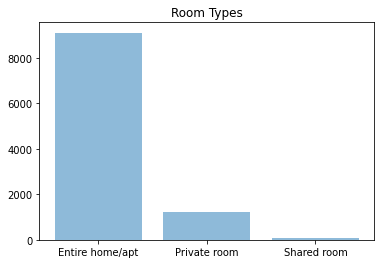

In [43]:
dfc = df.drop_duplicates(subset = 'id')
roomTypes = dfc['room_type'].value_counts()
objects = tuple(dfc['room_type'].drop_duplicates())
y_pos = np.arange(len(objects))
performance = roomTypes

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Room Types')
plt.show()

## 1.2 average prices for the 3 months

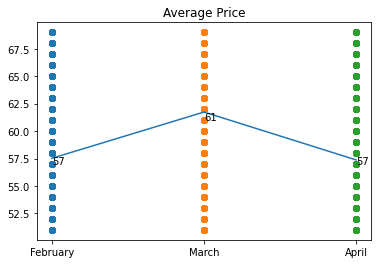

In [44]:
dft = df.loc[df["month"]=='febrouary']
dcf= dft['average_price']
dpf= dcf.loc[df['average_price'] < 70]
dpf= dpf.loc[df['average_price'] > 50]
avrf = dcf.mean()

dft = df.loc[df["month"]=='april']
dca= dft['average_price']
dpa= dca.loc[df['average_price'] < 70]
dpa= dpa.loc[df['average_price'] > 50]
avrm = dca.mean()

dft = df.loc[df["month"]=='march']
dcm= dft['average_price']
dpm= dcm.loc[df['average_price'] < 70]
dpm= dpm.loc[df['average_price'] > 50]
avra = dcm.mean()

names = ['February', 'March', 'April']

ya = [dpf ,dpa , dpm]
for xe, ye in zip(names, ya):
    plt.scatter([xe] * len(ye), ye)
for xe, ye in zip(names,[int(avrf),int(avrm),int(avra)]):
    plt.annotate(ye,xy=(xe,ye))
plt.plot(names,[avrf,avrm,avra])
plt.title('Average Price')
plt.show()

## 1.3 the 5 most rated neighbourhoods

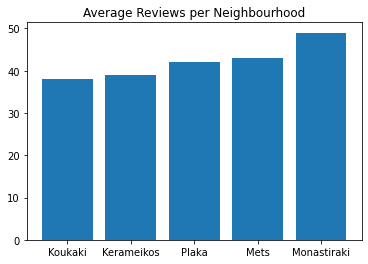

In [45]:
neighbourhood = df['neighbourhood'].unique()
top = pd.DataFrame(neighbourhood)
top.insert(1, 'average', 0)
j=0
for n in neighbourhood:
    dft = df.loc[df['neighbourhood'] == n]
    dft = dft[['neighbourhood','number_of_reviews']]
    avr = dft.mean()
    top.iat[j, 1] = avr
    j=j+1
top = top.sort_values(by='average')
top = top.tail(5)

plt.bar(top[0],top['average'])
plt.title('Average Reviews per Neighbourhood')
plt.show()

## 1.4 neighbourhood with most listings

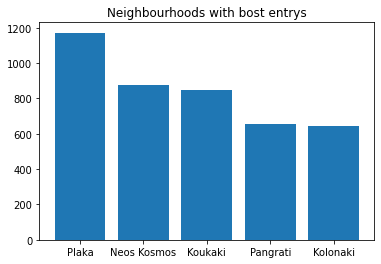

In [46]:
dfc = df.drop_duplicates(subset = 'id')
neighbourhoods = dfc['neighbourhood'].value_counts()
neighbourhoods = neighbourhoods.head(5)

plt.bar(neighbourhoods.keys(),neighbourhoods)
plt.title('Neighbourhoods with bost entrys')
plt.show()


## 1.5 listings per neighbourhood and month

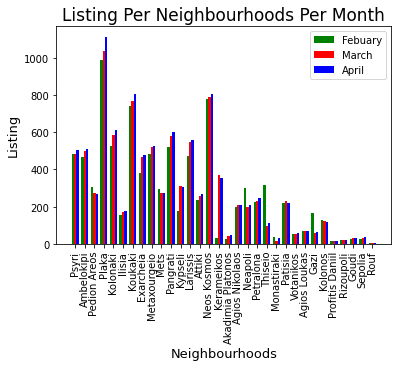

In [47]:
dff = df.loc[df["month"] == 'febrouary']
neighbourhood = df['neighbourhood'].unique()
neighbourhood = neighbourhood.tolist()
neighbourhood.remove('None Given')
sumf = pd.DataFrame(neighbourhood)
sumf.insert(1, 'total', 0)
sumf = sumf.rename(columns={0:'neighbourhood'})
j=0

for n in neighbourhood:
    dft = dff.loc[df['neighbourhood'] == n]
    dft = dft[['neighbourhood','id']]
    su = dft['id'].nunique()
    sumf.iat[j, 1] = su
    j= j+1

dfr = df.loc[df["month"] == 'march']
neighbourhood = df['neighbourhood'].unique()
neighbourhood = neighbourhood.tolist()
neighbourhood.remove('None Given')
summ = pd.DataFrame(neighbourhood)
summ.insert(1, 'total', 0)
summ = summ.rename(columns={0: 'neighbourhood'})
j=0
for t in neighbourhood:
    dfm = dfr.loc[df['neighbourhood'] == t]
    dfm = dfm[['neighbourhood','id']]
    su = dfm['id'].nunique()
    summ.iat[j, 1] = su
    j= j+1


dfc = df.loc[df["month"] == 'april']
neighbourhood = df['neighbourhood'].unique()
neighbourhood = neighbourhood.tolist()
neighbourhood.remove('None Given')
suma = pd.DataFrame(neighbourhood)
suma.insert(1, 'total', 0)
suma = suma.rename(columns={0: 'neighbourhood'})
j=0
for t in neighbourhood:
    dfa = dfc.loc[df['neighbourhood'] == t]
    dfa = dfa[['neighbourhood','id']]
    su = dfa['id'].nunique()
    suma.iat[j, 1] = su
    j= j+1

N = 32
ind = np.arange(N)
width = 0.25
ticks = sumf['neighbourhood'].tolist()
totalf = sumf['total'].tolist()
totalm = summ['total'].tolist()
totala = suma['total'].tolist()
plt.bar(ind-width,tuple(totalf),width,label='Febuary',color='green')
plt.bar(ind, tuple(totalm), width, label='March', color='red')
plt.bar(ind+width, tuple(totala), width, label='April', color='blue')
plt.xticks(ind , tuple(ticks),fontsize=10, rotation=90)

plt.ylabel('Listing',fontsize=13)
plt.xlabel('Neighbourhoods',fontsize=13)
plt.title('Listing Per Neighbourhoods Per Month',fontsize=17)

plt.legend(loc='best')
plt.show()

## q1.6 histogram of neighbourhood

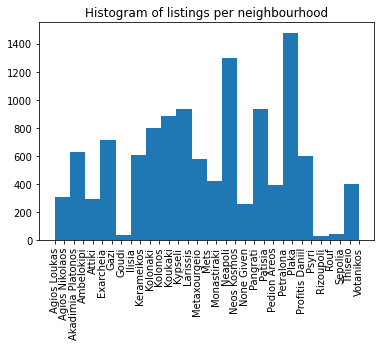

In [48]:
neigh = df.copy()
neigh = neigh[['neighbourhood', 'id']]
neigh = neigh.groupby(['neighbourhood', 'id']).count().reset_index()

plt.hist(neigh['neighbourhood'], bins=20)
plt.title('Histogram of listings per neighbourhood')
plt.xticks(rotation=90)
plt.show()

## 1.7 most common room type per neighbourhood

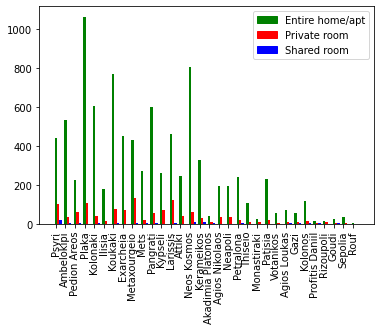

In [49]:
df = df.drop_duplicates(subset = 'id')
dfc = df[['neighbourhood','room_type']]
neighbourhoods = dfc['neighbourhood'].unique()
neighbourhoods = neighbourhoods.tolist()
neighbourhoods.remove('None Given')
room_types = dfc['room_type'].unique()
colors = ['green','red','blue']
i=0
for n in neighbourhoods:
    width = -0.25
    j=0
    for r in room_types:
        width=width+0.25
        dfr = dfc.loc[df['neighbourhood'] == n]
        dfr = dfr.loc[df['room_type'] == r]
        su = dfr['room_type'].count()
        plt.bar(i+width,su,0.25,color=colors[j])
        j=j+1

    i=i+1
ind = np.arange(i)
green_patch = mpatches.Patch(color='green', label='Entire home/apt')
red_patch = mpatches.Patch(color='red', label='Private room')
blue_patch = mpatches.Patch(color='blue', label='Shared room')
plt.legend(handles=[green_patch,red_patch,blue_patch])
plt.xticks( ind, neighbourhoods , fontsize=10, rotation=90)
plt.show()

## 1.8 most expensive type of room

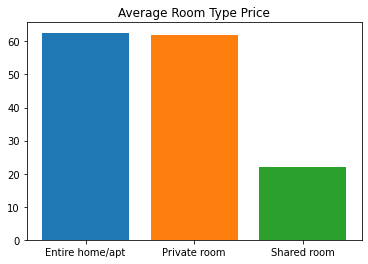

In [50]:
roomtypes = df['room_type'].unique()
for n in roomtypes:
    dft = df.loc[df['room_type'] == n]
    dft = dft[['room_type','average_price']]
    avr = dft.mean()
    plt.bar(n,avr)
plt.title('Average Room Type Price')
plt.show()


## 1.9 map

In [51]:
    from folium import Map, Popup
    import folium
    map = Map(location=[37.9193, 23.8307])    
    dft = train.replace(({'None Given': ''}))
    dft = dft.loc[dft["month"] == 'march']
    
    coordinates = dft[['longitude','latitude']]
    pop ='Name: ' + df['name'][i]+'\n'+'Price: '+str(df['price'][i])
    
    for i in range(0,int(len(coordinates)/2)):
        folium.Marker([coordinates.iloc[i]['latitude'], coordinates.iloc[i]['longitude']], 
                      popup=pop).add_to(map)
    map

## 1.10 wordclouds

In [52]:
from wordcloud import WordCloud, STOPWORDS

# ready wordcloud data
stopwords = STOPWORDS
d = df.copy()
d = d[['neighbourhood', 'transit', 'description', 'last_review']]
d['neighbourhood'] = d['neighbourhood'].str.replace('None Given', '')
d['neighbourhood'] = d['neighbourhood'].str.replace('Given None', '')
d['transit'] = d['transit'].str.replace('None Given', '')
d['transit'] = d['transit'].str.replace('Given None', '')
d['description'] = d['description'].str.replace('None Given', '')
d['description'] = d['description'].str.replace('Given None', '')
d['last_review'] = d['last_review'].str.replace('None Given', '')
d['last_review'] = d['last_review'].str.replace('Given None', '')

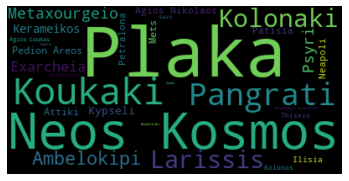

In [53]:
# 1. neighbourhood wordcloud
text = " ".join(neigh for neigh in d.neighbourhood)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

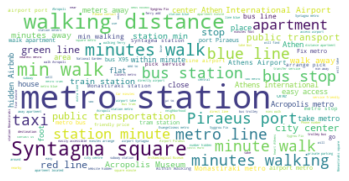

In [54]:
# 2. transit wordcloud
text = " ".join(tr for tr in d.transit)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

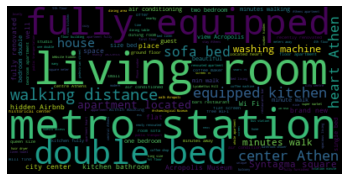

In [55]:
 # 3. description wordcloud
text = " ".join(descr for descr in d.description)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

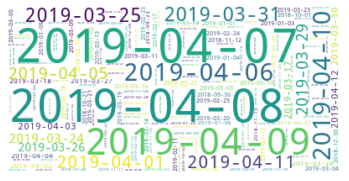

In [56]:
# 4. last_review wordcloud
freq = (d["last_review"].value_counts() / d["last_review"].count()).to_dict()
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3 Recommendation System

In [57]:
# ready data
df = train.replace(({'None Given': 'NULL'}))
Name = df['name']
Description = df['description']
concatenation = Name +' '+Description
concatenation.head()

0    Studio for 3 in the heart of Athens This studi...
1    96m2, 3BR, 2BA, Metro, WI-FI etc... Athens Fur...
2    75m2, 2-br, metro, wi-fi, cable TV Athens Furn...
3    Cool apartment for urban lovers A bright entir...
4    Cozy, independent studio in Athens center Char...
dtype: object

## 3.1 TF-IDF table

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

words = TfidfVectorizer(analyzer="char", ngram_range=(1,2)).fit_transform(concatenation)
print(words)

  (0, 3433)	0.005038406778723278
  (0, 3323)	0.006105063582592795
  (0, 3266)	0.007259667019705193
  (0, 2936)	0.0104764112491947
  (0, 2840)	0.007086315774212839
  (0, 2354)	0.013568900401226068
  (0, 3090)	0.009150890173402954
  (0, 2851)	0.0073060762229528575
  (0, 2151)	0.016880893779665163
  (0, 3002)	0.010487487341829029
  (0, 2780)	0.007452042535931499
  (0, 2069)	0.004827657830204877
  (0, 2766)	0.004064263250484073
  (0, 3478)	0.004773431269595554
  (0, 2089)	0.010326582851935147
  (0, 2603)	0.0056676102229244315
  (0, 361)	0.006735126769176082
  (0, 362)	0.024573790099390164
  (0, 2314)	0.011020708912486453
  (0, 3654)	0.009509580142864888
  (0, 3368)	0.004928844117717263
  (0, 3402)	0.009753830228173747
  (0, 706)	0.006135180043323016
  (0, 2132)	0.011553514417102746
  (0, 2918)	0.010524117668745078
  :	:
  (28121, 3508)	0.02116902133272583
  (28121, 3460)	0.007160792337035561
  (28121, 1003)	0.004904768299097353
  (28121, 2811)	0.09511958100025565
  (28121, 847)	0.062948304

## 3.4 words that are common together

In [61]:
import nltk.collocations

measures = nltk.collocations.BigramAssocMeasures()
pairs = nltk.collocations.BigramCollocationFinder.from_documents(concatenation.apply(lambda y: y.split()))

pairs.nbest(measures.likelihood_ratio, 10)

[('in', 'the'),
 ('fully', 'equipped'),
 ('living', 'room'),
 ('The', 'apartment'),
 ('heart', 'of'),
 ('walking', 'distance'),
 ('apartment', 'is'),
 ('of', 'the'),
 ('It', 'is'),
 ('from', 'the')]